# Matching for Causal Inference

## Imports

In [1]:
from causaldata import nsw_mixtape

from src.causal_inference.evaluation import balance
from src.causal_inference.matching import greedy_matching
from src.causal_inference.visualization import matching

In [2]:
data = nsw_mixtape.load_pandas().data

In [3]:
data.sample(5)

,data_id,treat,age,educ,black,hisp,marr,nodegree,re74,re75,re78
334,Dehejia-Wahba Sample,0,19,11,1,0,0,1,0.000000,0.000000,0.000000
145,Dehejia-Wahba Sample,1,19,11,1,0,0,1,2305.025879,2615.275879,4146.603027
82,Dehejia-Wahba Sample,1,38,12,0,0,0,0,0.000000,0.000000,4941.849121
192,Dehejia-Wahba Sample,0,34,11,1,0,1,1,0.000000,0.000000,6040.334961
83,Dehejia-Wahba Sample,1,27,13,1,0,0,0,0.000000,0.000000,0.000000


In [4]:
treated = data[data["treat"] == 1]
control = data[data["treat"] == 0]
print(f"Treated: {len(treated)}")
print(f"Control: {len(control)}")

Treated: 185
Control: 260


In [5]:
covariates = ["age", "educ", "re74", "re75"]

matched_pairs = greedy_matching.greedy_match(treated, control, covariates=covariates)

In [6]:
len(matched_pairs)

185

In [8]:
balance_summary = balance.compute_balance_stats(data, matched_pairs, covariates=covariates)

In [11]:
balance_summary.abs().T

,Before Matching,After Matching
age,0.107372,0.039587
educ,0.143676,0.042227
re74,0.002135,0.003303
re75,0.084148,0.019889


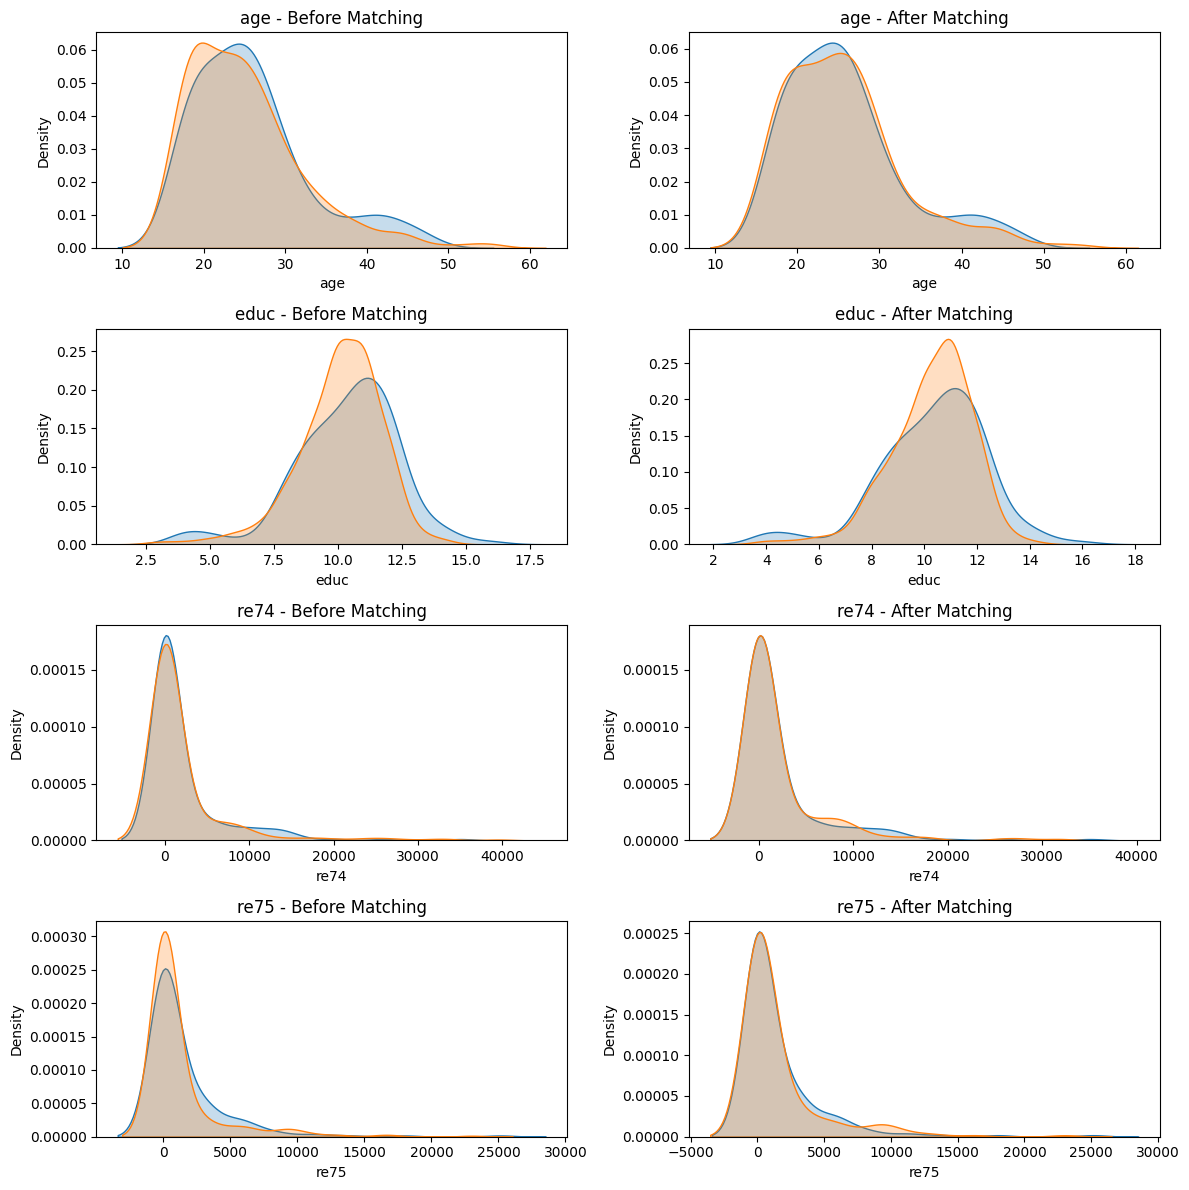

In [12]:
matching.plot_covariate_balance(data, matched_pairs, covariates=covariates)